In [1]:
%load_ext autoreload
%autoreload 2
%load_ext Cython

from __future__ import division
from __future__ import print_function

import sys,time,datetime,copy,subprocess,itertools,pickle,warnings,json,gc,numbers

import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

import Hawkes as hk

In [2]:
"""
para = {"mu":0.1, "alpha":0.5, "beta":10.0}
itv = [0,100000]
h1 = hk.simulator().set_kernel('exp').set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
np.savetxt('./Data/test1.txt',T)
"""

itv = [0,100000]
T = np.loadtxt('./Data/test1.txt')
h2 = hk.estimator().set_kernel('exp').set_baseline('const')
h2.fit(T,itv)
print(h2.para)
print(h2.L)
print()

print("""--- expected output
mu     0     0.100300
alpha  0     0.492921
beta   0    10.047259
dtype: float64
-29044.49885866516""")

mu     0     0.100300
alpha  0     0.492921
beta   0    10.047259
dtype: float64
-29044.498858665163

--- expected output
mu     0     0.100300
alpha  0     0.492921
beta   0    10.047259
dtype: float64
-29044.49885866516


In [3]:
"""
para = {"mu":0.1, "alpha":[0.25,0.25], "beta":[1.0,20.0]}
itv = [0,100000]
h1 = hk.simulator().set_kernel('exp',num_exp=2).set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
np.savetxt('./Data/test2.txt',T)
"""

itv = [0,100000]
T = np.loadtxt('./Data/test2.txt')
h2 = hk.estimator().set_kernel('exp',num_exp=2).set_baseline('const')
h2.fit(T,itv)
print(h2.para)
print(h2.L)
print()

print("""--- expected output
mu     0     0.100146
alpha  0     0.241877
       1     0.264525
beta   0     1.017910
       1    18.971908
dtype: float64
-36930.924620952515""")

mu     0     0.100146
alpha  0     0.241877
       1     0.264525
beta   0     1.017910
       1    18.971908
dtype: float64
-36930.924620952515

--- expected output
mu     0     0.100146
alpha  0     0.241877
       1     0.264525
beta   0     1.017910
       1    18.971908
dtype: float64
-36930.924620952515


In [4]:
"""
para = {"mu":0.1, "k":0.5,"p":2.0,"c":1.0}
itv = [0,100000]
h1 = hk.simulator().set_kernel('pow').set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
np.savetxt('./Data/test3.txt',T)
"""

itv = [0,100000]
T = np.loadtxt('./Data/test3.txt')
h2 = hk.estimator().set_kernel('pow').set_baseline('const')
h2.fit(T,itv)
print(h2.para)
print(h2.L)
print()

print("""--- expected output
mu  0    0.099776
k   0    0.423059
p   0    1.919163
c   0    0.906962
dtype: float64
-47636.336001193165""")

mu  0    0.099776
k   0    0.423059
p   0    1.919163
c   0    0.906962
dtype: float64
-47636.33600119316

--- expected output
mu  0    0.099776
k   0    0.423059
p   0    1.919163
c   0    0.906962
dtype: float64
-47636.336001193165


mu     0    11.219357
       1    19.433684
       2    15.672260
       3     3.651822
       4     1.136541
       5     9.467684
alpha  0     0.166991
beta   0    10.708538
dtype: float64
2064.6714021508496

mu     0     3.286311
       1    -0.055172
       2     6.473691
       3    -1.327060
       4     0.249835
       5    11.392068
alpha  0     0.160945
beta   0    10.368207
dtype: float64
2066.30987574014

--- expected output
mu     0    11.219269
       1    19.433742
       2    15.672241
       3     3.651817
       4     1.136552
       5     9.467625
alpha  0     0.166991
beta   0    10.708514
dtype: float64
2064.671273176019

mu     0     3.286057
       1    -0.055010
       2     6.473560
       3    -1.326997
       4     0.249923
       5    11.391547
alpha  0     0.160951
beta   0    10.367967
dtype: float64
2066.3084557436696


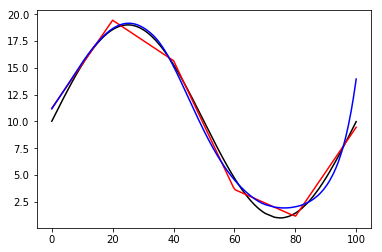

In [4]:
"""
para = {"alpha":0.2,"beta":10.0}
mu_t = lambda x: 10.0 + 9.0*np.sin(2*np.pi*x/100)
itv = [0,100]
h1 = hk.simulator().set_kernel("exp").set_baseline('custom',l_custom=mu_t).set_parameter(para)
T = h1.simulate(itv)
np.savetxt('./Data/test4.txt',T)
"""

itv = [0,100]
T = np.loadtxt('./Data/test4.txt')

# piecewise lienar model
h2 = hk.estimator().set_kernel("exp").set_baseline('plinear',num_basis=6)
h2.fit(T,itv)
print(h2.para)
print(h2.L)
print()

# log-linear model
h3 = hk.estimator().set_kernel("exp").set_baseline('loglinear',num_basis=6)
h3.fit(T,itv)
print(h3.para)
print(h3.L)
print()

print("""--- expected output
mu     0    11.219269
       1    19.433742
       2    15.672241
       3     3.651817
       4     1.136552
       5     9.467625
alpha  0     0.166991
beta   0    10.708514
dtype: float64
2064.671273176019

mu     0     3.286057
       1    -0.055010
       2     6.473560
       3    -1.326997
       4     0.249923
       5    11.391547
alpha  0     0.160951
beta   0    10.367967
dtype: float64
2066.3084557436696""")

mu_t = lambda x: 10.0 + 9.0*np.sin(2*np.pi*x/100)
plt.plot(T,mu_t(T),"k-")
plt.plot(T,h2.baseline.l(T),"r-")
plt.plot(T,h3.baseline.l(T),"b-")
pass